In \[1\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import pingouin as pg

In \[2\]:

    import scipy
    from scipy.stats import chi2
    from scipy.stats import chi2_contingency
    from scipy.stats import pearsonr, spearmanr

In \[3\]:

    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

In \[4\]:

    from category_encoders import BinaryEncoder

In \[5\]:

    from IPython.display import Image
    import pydotplus

In \[6\]:

    import matplotlib.pyplot as plt
    %matplotlib inline
    color = sns.color_palette()
    seed = 42

In \[7\]:

    pwd

Out\[7\]:

    'C:\\Users\\hp'

In \[7\]:

    import os
    os.chdir('C:\Python')

In \[8\]:

    data = pd.read_csv('lending_club_loan_dataset.csv', low_memory=False)
    data.head()

Out\[8\]:

|     | id       | grade | annual_inc | short_emp | emp_length_num | home_ownership | dti   | purpose            | term      | last_delinq_none | last_major_derog_none | revol_util | total_rec_late_fee | od_ratio | bad_loan |
|-----|----------|-------|------------|-----------|----------------|----------------|-------|--------------------|-----------|------------------|-----------------------|------------|--------------------|----------|----------|
| 0   | 11454641 | A     | 100000.0   | 1         | 1              | RENT           | 26.27 | credit_card        | 36 months | 1                | NaN                   | 43.2       | 0.0                | 0.160624 | 0        |
| 1   | 9604874  | A     | 83000.0    | 0         | 4              | OWN            | 5.39  | credit_card        | 36 months | 0                | NaN                   | 21.5       | 0.0                | 0.810777 | 0        |
| 2   | 9684700  | D     | 78000.0    | 0         | 11             | MORTGAGE       | 18.45 | debt_consolidation | 60 months | 1                | NaN                   | 46.3       | 0.0                | 0.035147 | 1        |
| 3   | 9695736  | D     | 37536.0    | 0         | 6              | MORTGAGE       | 12.28 | medical            | 60 months | 0                | NaN                   | 10.7       | 0.0                | 0.534887 | 1        |
| 4   | 9795013  | D     | 65000.0    | 0         | 11             | MORTGAGE       | 11.26 | debt_consolidation | 36 months | 0                | NaN                   | 15.2       | 0.0                | 0.166500 | 0        |

In \[9\]:

    data[['grade','dti']]

Out\[9\]:

|       | grade | dti   |
|-------|-------|-------|
| 0     | A     | 26.27 |
| 1     | A     | 5.39  |
| 2     | D     | 18.45 |
| 3     | D     | 12.28 |
| 4     | D     | 11.26 |
| ...   | ...   | ...   |
| 19995 | B     | 18.36 |
| 19996 | B     | 23.22 |
| 19997 | B     | 13.27 |
| 19998 | A     | 12.84 |
| 19999 | B     | 2.20  |

20000 rows × 2 columns

In \[9\]:

    data.columns

Out\[9\]:

    Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
           'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
           'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
           'bad_loan'],
          dtype='object')

In \[6\]:

     

In \[ \]:

     

In \[ \]:

     

In \[11\]:

     

Out\[11\]:

In \[10\]:

    data.describe().round(3)

Out\[10\]:

|       | id           | annual_inc  | short_emp | emp_length_num | dti       | last_delinq_none | last_major_derog_none | revol_util | total_rec_late_fee | od_ratio  | bad_loan |
|-------|--------------|-------------|-----------|----------------|-----------|------------------|-----------------------|------------|--------------------|-----------|----------|
| count | 2.000000e+04 | 20000.000   | 20000.000 | 20000.000      | 19846.000 | 20000.000        | 574.000               | 20000.000  | 20000.000          | 20000.000 | 20000.0  |
| mean  | 7.590662e+06 | 73349.578   | 0.112     | 6.821          | 16.588    | 0.547            | 0.760                 | 55.958     | 0.291              | 0.504     | 0.2      |
| std   | 1.609593e+06 | 45198.567   | 0.316     | 3.774          | 7.586     | 0.498            | 0.428                 | 42.117     | 3.109              | 0.288     | 0.4      |
| min   | 5.860400e+05 | 8412.000    | 0.000     | 0.000          | 0.000     | 0.000            | 0.000                 | 0.000      | 0.000              | 0.000     | 0.0      |
| 25%   | 6.206283e+06 | 47000.000   | 0.000     | 3.000          | 10.852    | 0.000            | 1.000                 | 38.800     | 0.000              | 0.257     | 0.0      |
| 50%   | 7.378896e+06 | 65000.000   | 0.000     | 7.000          | 16.190    | 1.000            | 1.000                 | 57.100     | 0.000              | 0.507     | 0.0      |
| 75%   | 8.766235e+06 | 88000.000   | 0.000     | 11.000         | 22.060    | 1.000            | 1.000                 | 73.900     | 0.000              | 0.754     | 0.0      |
| max   | 1.145464e+07 | 1000000.000 | 1.000     | 11.000         | 34.990    | 1.000            | 1.000                 | 5010.000   | 96.467             | 1.000     | 1.0      |

In \[12\]:

    data.describe(include=[np.object])

    C:\Users\hp\AppData\Local\Temp/ipykernel_10180/1422700444.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
    Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
      data.describe(include=[np.object])

Out\[12\]:

|        | grade | home_ownership | purpose            | term      |
|--------|-------|----------------|--------------------|-----------|
| count  | 20000 | 18509          | 20000              | 20000     |
| unique | 7     | 3              | 12                 | 3         |
| top    | B     | MORTGAGE       | debt_consolidation | 36 months |
| freq   | 6042  | 9844           | 12337              | 14969     |

In \[9\]:

    # Checking data balance/proportion
    loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
    loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
    display(loan)

    # pie chart
    data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
    plt.legend(["0: paid loan","1: not paid loan"]);

|     | absolute | percent |
|-----|----------|---------|
| 0   | 16000    | 80.0    |
| 1   | 4000     | 20.0    |

![](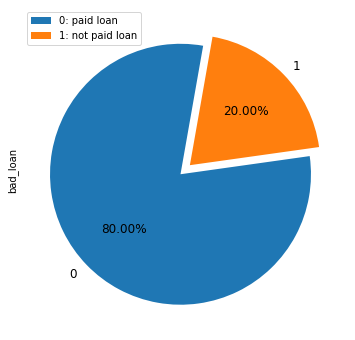%0A)

In \[13\]:

    data.dtypes.value_counts()

Out\[13\]:

    float64    6
    int64      5
    object     4
    dtype: int64

In \[14\]:

    nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
    nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
    nulval

Out\[14\]:

|                       | absolute | percent |
|-----------------------|----------|---------|
| id                    | 0        | 0.00    |
| grade                 | 0        | 0.00    |
| annual_inc            | 0        | 0.00    |
| short_emp             | 0        | 0.00    |
| emp_length_num        | 0        | 0.00    |
| home_ownership        | 1491     | 7.08    |
| dti                   | 154      | 0.73    |
| purpose               | 0        | 0.00    |
| term                  | 0        | 0.00    |
| last_delinq_none      | 0        | 0.00    |
| last_major_derog_none | 19426    | 92.19   |
| revol_util            | 0        | 0.00    |
| total_rec_late_fee    | 0        | 0.00    |
| od_ratio              | 0        | 0.00    |
| bad_loan              | 0        | 0.00    |

In \[10\]:

    def stats(x):
        print(f"Variable: {x}")
        print(f"Type of variable: {data[x].dtype}")
        print(f"Total observations: {data[x].shape[0]}")
        detect_null_val = data[x].isnull().values.any()
        if detect_null_val:
            print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
        else:
            print(f"Missing values? {data[x].isnull().values.any()}")
        print(f"Unique values: {data[x].nunique()}")
        if data[x].dtype != "O":
            print(f"Min: {int(data[x].min())}")
            print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
            print(f"Median: {int(data[x].median())}")
            print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
            print(f"Max: {int(data[x].max())}")
            print(f"Mean: {data[x].mean()}")
            print(f"Std dev: {data[x].std()}")
            print(f"Variance: {data[x].var()}")
            print(f"Skewness: {scipy.stats.skew(data[x])}")
            print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
            print("")
            print("Percentiles 1%, 5%, 95%, 99%")
            display(data[x].quantile(q=[.01, .05, .95, .99]))
            print("")
        else:
            print(f"List of unique values: {data[x].unique()}")

In \[11\]:

        stats('annual_inc')           

    Variable: annual_inc
    Type of variable: float64
    Total observations: 20000
    Missing values? False
    Unique values: 2566
    Min: 8412
    25%: 47000
    Median: 65000
    75%: 88000
    Max: 1000000
    Mean: 73349.57835
    Std dev: 45198.56725472537
    Variance: 2042910481.8799326
    Skewness: 5.275648123592321
    Kurtosis: 66.72665803201564

    Percentiles 1%, 5%, 95%, 99%

    0.01     20519.5
    0.05     30000.0
    0.95    145000.0
    0.99    225000.0
    Name: annual_inc, dtype: float64

In \[12\]:

    # Variable vs. target chart
    def target(x):
        short_0 = data[data.bad_loan == 0].loc[:,x]
        short_1 = data[data.bad_loan == 1].loc[:,x]
        
        a = np.array(short_0)
        b = np.array(short_1)
        
        np.warnings.filterwarnings('ignore')
        
        plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
        plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
        plt.legend(loc='upper right')
        plt.title(x, fontsize=10, loc="right")
        plt.xlabel('Relative frequency')
        plt.ylabel('Absolute frequency')
        plt.show()

In \[14\]:

    target('annual_inc')

![](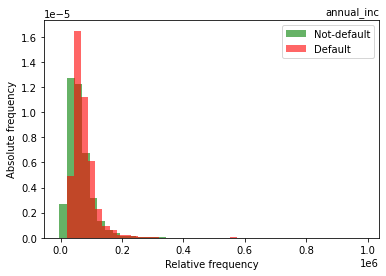%0A)

In \[13\]:

    def boxhist(x):
        variable = data[x]
        np.array(variable).mean()
        np.median(variable)
        
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
        mean=np.array(variable).mean()
        median=np.median(variable)
        
        sns.boxplot(variable, ax=ax_box)
        ax_box.axvline(mean, color='r', linestyle='--')
        ax_box.axvline(median, color='g', linestyle='-')
        
        sns.distplot(variable, ax=ax_hist)
        ax_hist.axvline(mean, color='r', linestyle='--')
        ax_hist.axvline(median, color='g', linestyle='-')
        
        plt.title(x, fontsize=10, loc="right")
        plt.legend({'Mean':mean,'Median':median})
        ax_box.set(xlabel='')
        plt.show()

In \[14\]:

    # Histogram
    def hist(x):
        plt.hist(data[x], bins=25)
        plt.title(x, fontsize=10, loc="right")
        plt.xlabel('Relative frequency')
        plt.ylabel('Absolute frequency')
        plt.show()

In \[15\]:

    # Pie chart
    def pie(x):
        data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});

In \[16\]:

    def target(x):
        short_0 = data[data.bad_loan == 0].loc[:,x]
        short_1 = data[data.bad_loan == 1].loc[:,x]
        
        a = np.array(short_0)
        b = np.array(short_1)
        
        np.warnings.filterwarnings('ignore')
        
        plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
        plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
        plt.legend(loc='upper right')
        plt.title(x, fontsize=10, loc="right")
        plt.xlabel('Relative frequency')
        plt.ylabel('Absolute frequency')
        plt.show()

In \[17\]:

    def boxhist(x):
        variable = data[x]
        np.array(variable).mean()
        np.median(variable)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
        mean=np.array(variable).mean()
        median=np.median(variable)
        sns.boxplot(variable, ax=ax_box)
        ax_box.axvline(mean, color='r', linestyle='--')
        ax_box.axvline(median, color='g', linestyle='-')
        sns.distplot(variable, ax=ax_hist)
        ax_hist.axvline(mean, color='r', linestyle='--')
        ax_hist.axvline(median, color='g', linestyle='-')
        plt.title(x, fontsize=10, loc="right")
        plt.legend({'Mean':mean,'Median':median})
        ax_box.set(xlabel='')
        plt.show()

In \[18\]:

    def bar(x):
        ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
        for p in ax.patches:
            ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.xlabel(x, fontsize=10)
        plt.xticks(rotation=0, horizontalalignment="center")
        plt.ylabel("Absolute values", fontsize=10)
        plt.title(x, fontsize=10, loc="right")

In \[19\]:

    def barh(x):
        data[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
        plt.xlabel("Absolute values", fontsize=10)
        plt.xticks(rotation=0, horizontalalignment="center")
        plt.ylabel(x, fontsize=10)
        plt.title(x, fontsize=10, loc="right")

In \[20\]:

    # Pivot_table_mean
    def pivot_mean(a, b, c):
        type_pivot_mean = data.pivot_table(
            columns=a,
            index=b,
            values=c, aggfunc=np.mean)
        display(type_pivot_mean)
    # Display pivot_table
        type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
    # Pivot_table_sum
    def pivot_sum(a, b, c):
        type_pivot_sum = data.pivot_table(
            columns=a,
            index=b,
            values=c, aggfunc=np.sum)
        display(type_pivot_sum)
    # Display pivot_table
        type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

In \[21\]:

        
    # Scatter plot
    def scatter(x, y):
        targets = data["bad_loan"].unique()
        for target in targets:
            a = data[data["bad_loan"] == target][x]
            b = data[data["bad_loan"] == target][y]
        plt.scatter(a, b, label=f"bad loan: {target}", marker="*")
        plt.xlabel(x, fontsize=10)
        plt.ylabel(y, fontsize=10)
        plt.title("abc", fontsize=10, loc="right")
        plt.legend()
        plt.show()

In \[26\]:

    data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
    plt.tight_layout()
    plt.show()

![](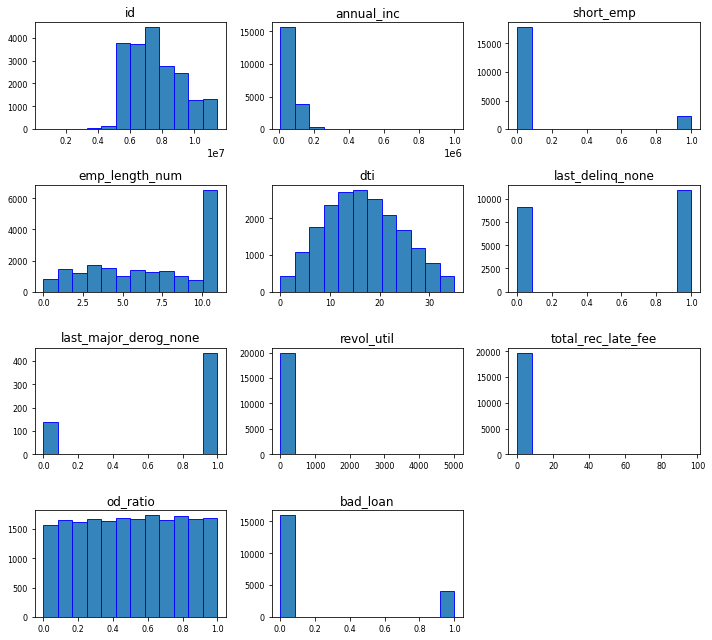%0A)

In \[21\]:

    data['term'].replace(' 36 Months',' 36 months',inplace=True)

In \[28\]:

    for col in data.select_dtypes(include=["object"]).columns:
        data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
        
        plt.xlabel("Class", fontsize=10)
        plt.xticks(rotation=90, horizontalalignment="center")
        plt.ylabel("Count", fontsize=10)
        plt.title(col, fontsize=10, loc="right")
        plt.show()

![](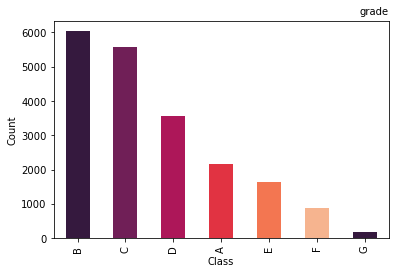%0A)

![](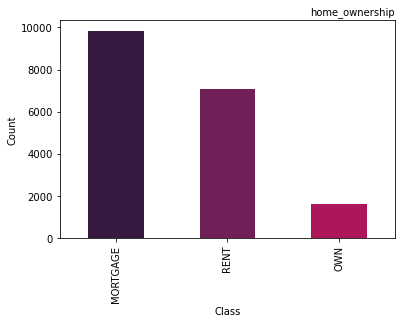%0A)

![](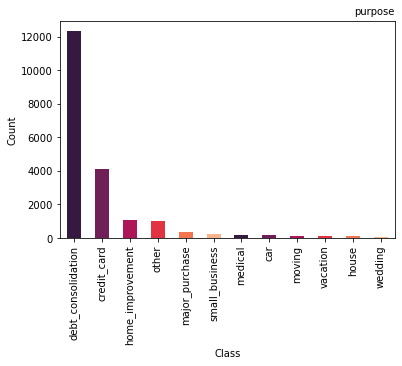%0A)

![](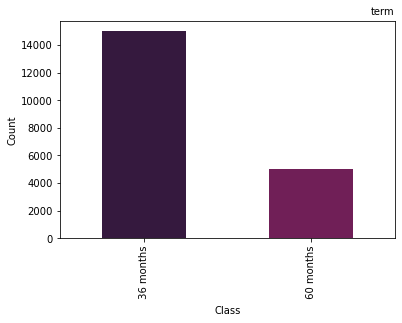%0A)

In \[29\]:

    bar("grade")

![](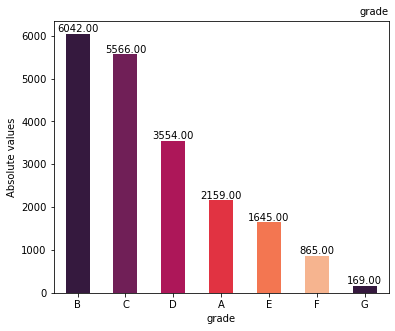%0A)

In \[30\]:

    pivot_sum("home_ownership","grade","id")

| home_ownership | MORTGAGE    | OWN        | RENT        |
|----------------|-------------|------------|-------------|
| grade          |             |            |             |
| A              | 10125413622 | 1317629640 | 4051026441  |
| B              | 23885885410 | 3462708590 | 14760476369 |
| C              | 20610251432 | 3556938433 | 15150732416 |
| D              | 11302570597 | 2341863113 | 11151017359 |
| E              | 5710749816  | 1018416369 | 4929639589  |
| F              | 2609177317  | 666981482  | 2724192127  |
| G              | 536342691   | 109804609  | 529908890   |

![](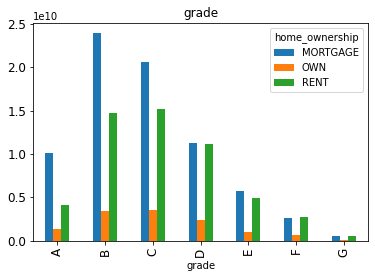%0A)

In \[31\]:

    target("grade")

![](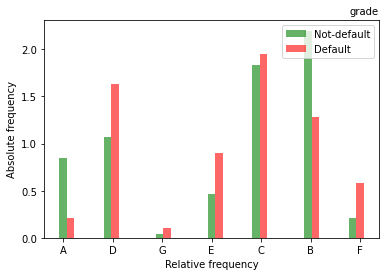%0A)

In \[32\]:

    boxhist("annual_inc")

![](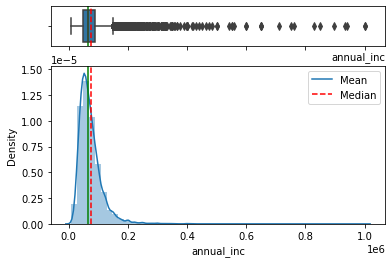%0A)

In \[33\]:

    target("annual_inc")

![](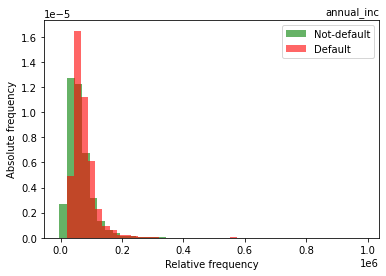%0A)

In \[34\]:

    scatter("annual_inc","dti")                  ##something wrong (graph is not right)

![](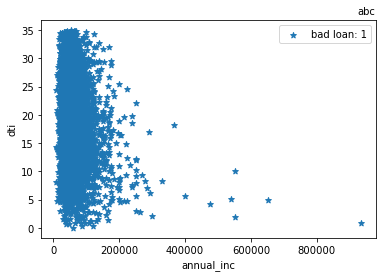%0A)

In \[ \]:

     

In \[ \]:

     

In \[36\]:

    hist("short_emp")

![](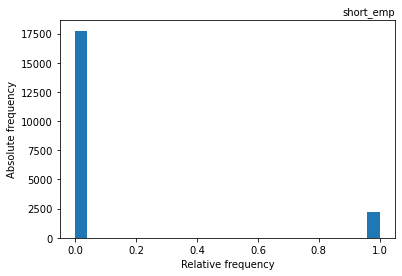%0A)

In \[37\]:

    target("short_emp")

![](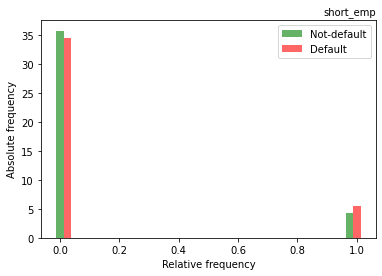%0A)

In \[38\]:

    boxhist("emp_length_num")

![](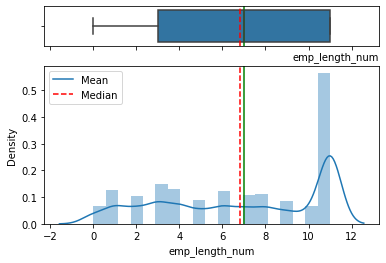%0A)

In \[39\]:

    target("emp_length_num")

![](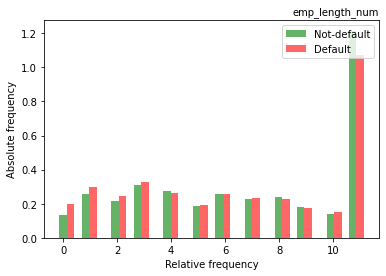%0A)

In \[40\]:

    target("emp_length_num")

![](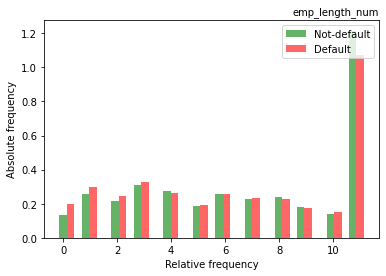%0A)

In \[41\]:

    pivot_mean("bad_loan", "purpose", "emp_length_num")

| bad_loan           | 0        | 1        |
|--------------------|----------|----------|
| purpose            |          |          |
| car                | 5.760870 | 4.500000 |
| credit_card        | 6.715284 | 6.357550 |
| debt_consolidation | 7.028006 | 6.603143 |
| home_improvement   | 7.073281 | 6.870813 |
| house              | 5.802326 | 4.933333 |
| major_purchase     | 6.269625 | 6.081395 |
| medical            | 6.904412 | 6.435897 |
| moving             | 5.827957 | 4.133333 |
| other              | 6.803213 | 6.609489 |
| small_business     | 6.474576 | 5.931818 |
| vacation           | 7.151163 | 7.192308 |
| wedding            | 5.014925 | 6.315789 |

![](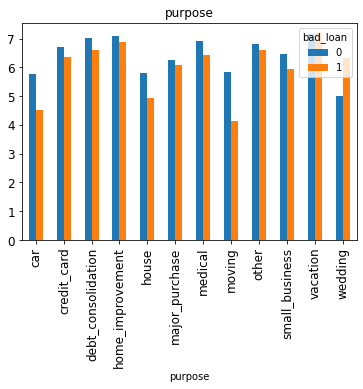%0A)

In \[42\]:

    bar("home_ownership")

![](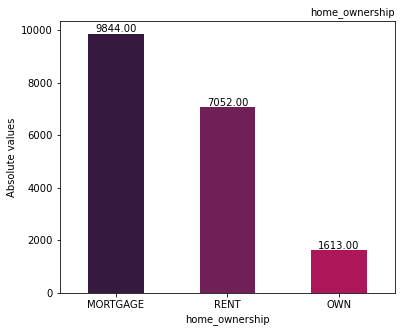%0A)

In \[43\]:

    pie("home_ownership")

![](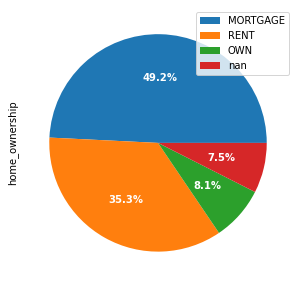%0A)

In \[44\]:

    pivot_sum("bad_loan", "home_ownership", "id")

| bad_loan       | 0           | 1           |
|----------------|-------------|-------------|
| home_ownership |             |             |
| MORTGAGE       | 62024618628 | 12755772257 |
| OWN            | 10069692998 | 2404649238  |
| RENT           | 40735387375 | 12561605816 |

![](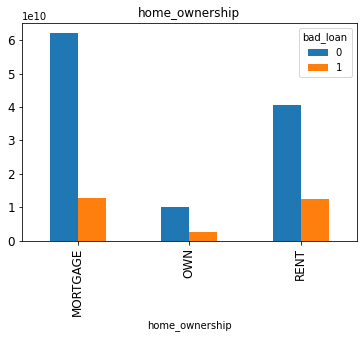%0A)

In \[45\]:

    boxhist("dti")

![](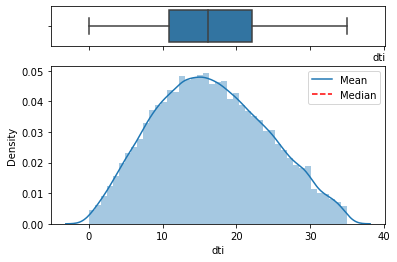%0A)

In \[46\]:

    target("dti")

![](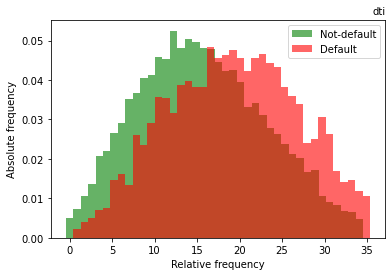%0A)

In \[47\]:

    pivot_sum("home_ownership", "purpose", "dti")

| home_ownership     | MORTGAGE  | OWN      | RENT     |
|--------------------|-----------|----------|----------|
| purpose            |           |          |          |
| car                | 863.18    | 362.36   | 837.01   |
| credit_card        | 33224.36  | 5383.50  | 25230.23 |
| debt_consolidation | 103013.35 | 16068.56 | 74421.50 |
| home_improvement   | 10866.29  | 2020.66  | 922.21   |
| house              | 386.92    | 134.76   | 718.56   |
| major_purchase     | 2081.56   | 519.82   | 2204.26  |
| medical            | 1186.83   | 194.44   | 1047.97  |
| moving             | 280.34    | 122.21   | 1236.81  |
| other              | 6840.32   | 1656.78  | 6584.84  |
| small_business     | 1839.01   | 351.81   | 1285.08  |
| vacation           | 580.01    | 221.98   | 873.72   |
| wedding            | 405.70    | 184.59   | 639.79   |

![](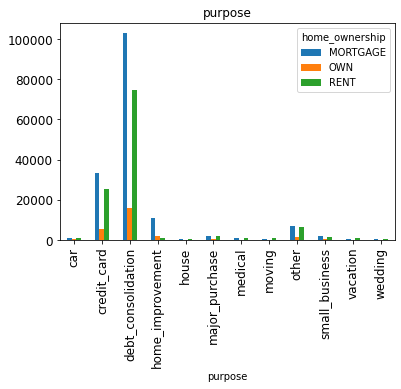%0A)

In \[48\]:

    pivot_sum("bad_loan", "grade", "dti")

| bad_loan | 0        | 1        |
|----------|----------|----------|
| grade    |          |          |
| A        | 28585.16 | 2130.11  |
| B        | 81890.81 | 13859.61 |
| C        | 72020.76 | 21883.30 |
| D        | 43094.93 | 18423.00 |
| E        | 18820.49 | 10220.30 |
| F        | 8621.77  | 6686.74  |
| G        | 1752.69  | 1212.63  |

![](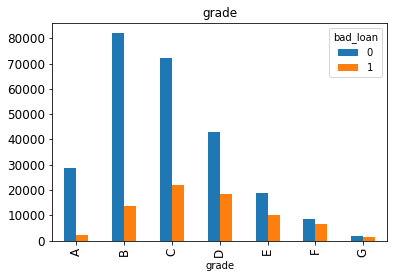%0A)

In \[49\]:

    barh("purpose")

![](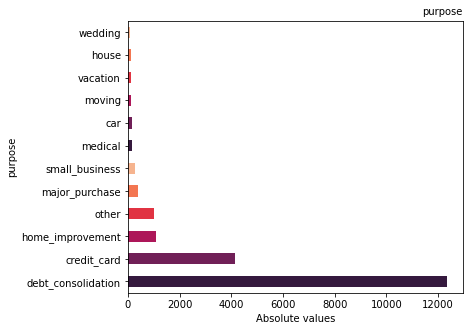%0A)

In \[50\]:

    pivot_sum("bad_loan", "purpose", "id")

| bad_loan           | 0           | 1           |
|--------------------|-------------|-------------|
| purpose            |             |             |
| car                | 1070129314  | 216325988   |
| credit_card        | 26386780714 | 5340476464  |
| debt_consolidation | 75102879435 | 18555640551 |
| home_improvement   | 6644887055  | 1502903381  |
| house              | 637766829   | 103586113   |
| major_purchase     | 2178415440  | 660763827   |
| medical            | 1073061905  | 307640771   |
| moving             | 701823712   | 219651796   |
| other              | 5725665050  | 1988147906  |
| small_business     | 1359036598  | 675408630   |
| vacation           | 636017070   | 194444827   |
| wedding            | 414512287   | 117275863   |

![](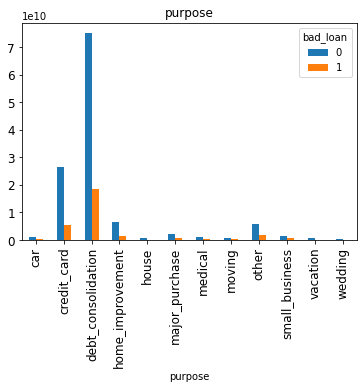%0A)

In \[51\]:

    pie("term")

![](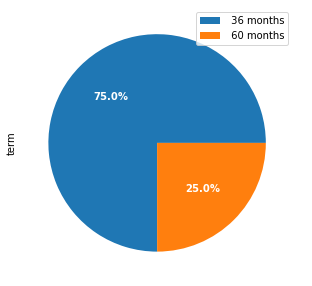%0A)

In \[52\]:

    target("term")

![](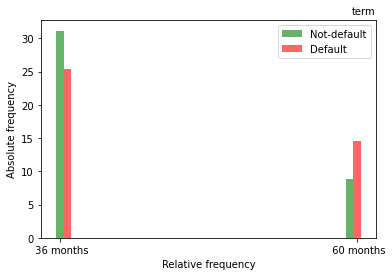%0A)

In \[53\]:

    pivot_mean("term", "grade", "annual_inc")

| term  | 36 months     | 60 months    |
|-------|---------------|--------------|
| grade |               |              |
| A     | 83456.905553  | 89204.942308 |
| B     | 71353.945618  | 80193.794444 |
| C     | 68697.487576  | 77522.113440 |
| D     | 65478.678457  | 80732.477486 |
| E     | 69688.921136  | 80009.862512 |
| F     | 72240.582734  | 77307.279614 |
| G     | 122857.142857 | 89206.913580 |

![](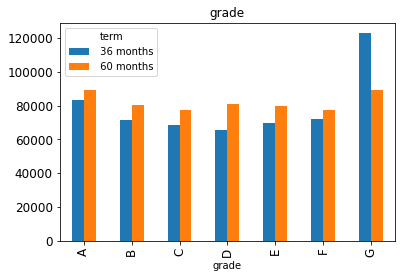%0A)

In \[54\]:

    target("last_delinq_none")

![](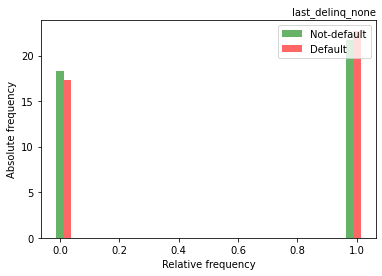%0A)

In \[55\]:

    pie("last_delinq_none")

![](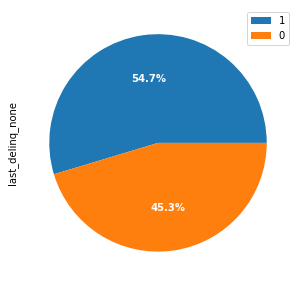%0A)

In \[56\]:

    pivot_mean("bad_loan","purpose","last_delinq_none")

| bad_loan           | 0        | 1        |
|--------------------|----------|----------|
| purpose            |          |          |
| car                | 0.615942 | 0.433333 |
| credit_card        | 0.578748 | 0.599715 |
| debt_consolidation | 0.529072 | 0.566479 |
| home_improvement   | 0.524239 | 0.516746 |
| house              | 0.558140 | 0.733333 |
| major_purchase     | 0.569966 | 0.511628 |
| medical            | 0.514706 | 0.487179 |
| moving             | 0.602151 | 0.566667 |
| other              | 0.514056 | 0.569343 |
| small_business     | 0.570621 | 0.534091 |
| vacation           | 0.546512 | 0.730769 |
| wedding            | 0.522388 | 0.578947 |

![](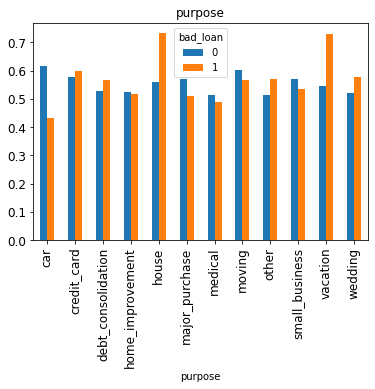%0A)

In \[57\]:

    bar("last_major_derog_none")

![](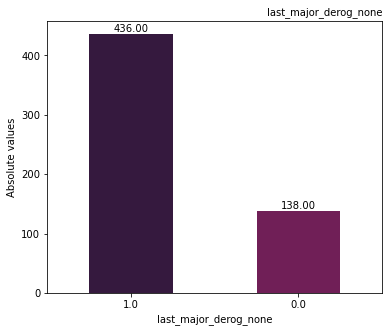%0A)

In \[58\]:

    target("last_major_derog_none")

![](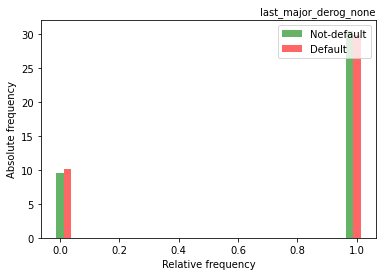%0A)

In \[59\]:

    scatter("annual_inc", "revol_util")

![](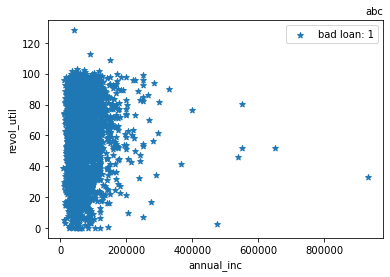%0A)

In \[60\]:

    boxhist("revol_util")

![](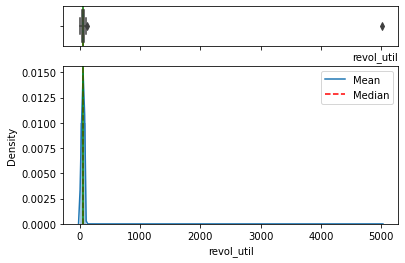%0A)

In \[61\]:

    target("total_rec_late_fee")

![](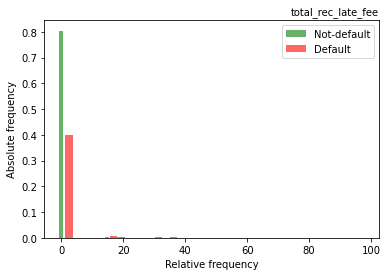%0A)

In \[62\]:

    scatter("annual_inc", "total_rec_late_fee")

![](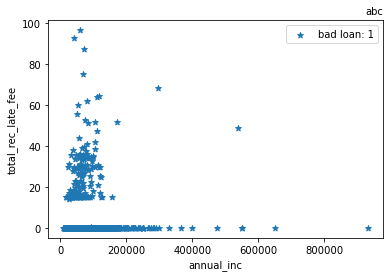%0A)

In \[ \]:

     

In \[64\]:

    pivot_mean("bad_loan", "purpose", "total_rec_late_fee")

| bad_loan           | 0        | 1        |
|--------------------|----------|----------|
| purpose            |          |          |
| car                | 0.000000 | 0.000000 |
| credit_card        | 0.087120 | 0.754202 |
| debt_consolidation | 0.067130 | 1.087271 |
| home_improvement   | 0.146776 | 1.556608 |
| house              | 0.174419 | 6.594467 |
| major_purchase     | 0.254948 | 0.871894 |
| medical            | 0.110294 | 1.460797 |
| moving             | 0.161290 | 0.999413 |
| other              | 0.080293 | 1.120423 |
| small_business     | 0.697966 | 2.578219 |
| vacation           | 0.000000 | 2.041373 |
| wedding            | 0.253881 | 0.000000 |

![](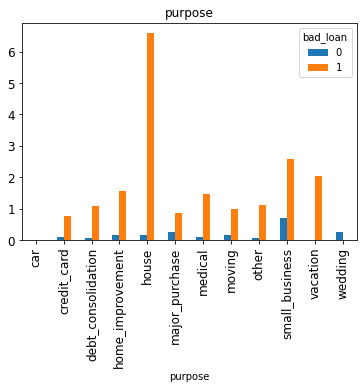%0A)

In \[65\]:

    boxhist("od_ratio")

![](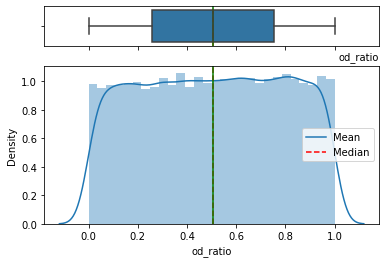%0A)

In \[66\]:

    scatter("annual_inc", "od_ratio")

![](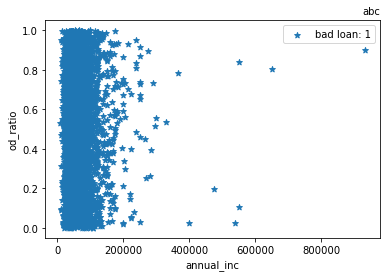%0A)

In \[22\]:

    data['term'].replace(' 36 Months',' 36 months',inplace=True)
    pivot_sum("bad_loan", "term", "od_ratio")

| bad_loan  | 0           | 1           |
|-----------|-------------|-------------|
| term      |             |             |
| 36 months | 6292.986498 | 1278.090039 |
| 60 months | 1776.969682 | 740.559880  |

![](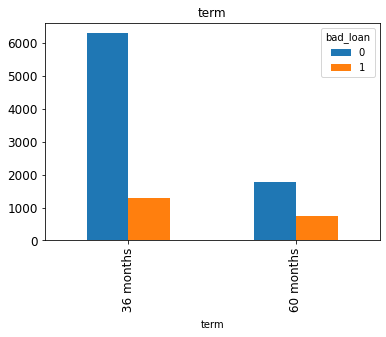%0A)

In \[69\]:

    bar("bad_loan")

![](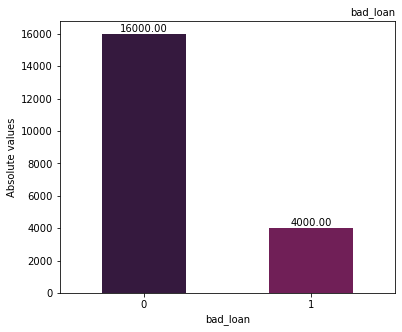%0A)

In \[22\]:

    mask = np.triu(data.corr(), 1)
    plt.figure(figsize=(19, 9))
    sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

![](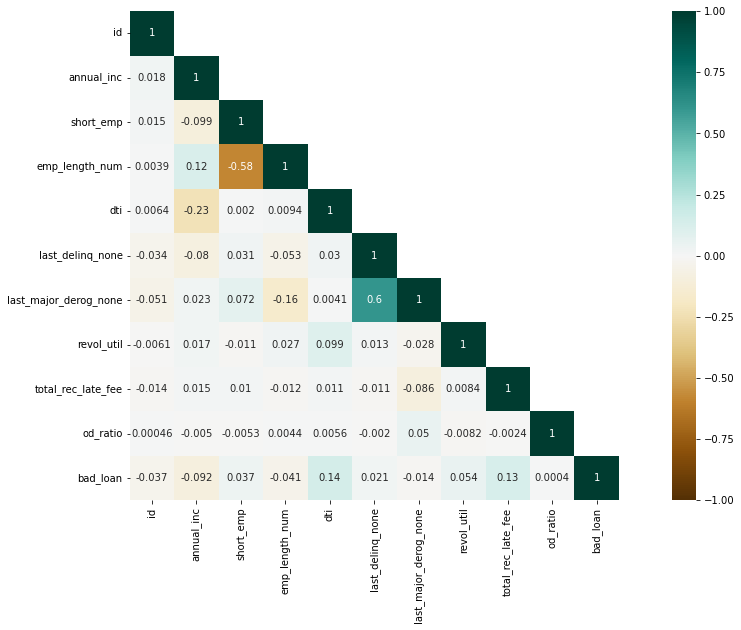%0A)

In \[23\]:

    bad_loan_c = pg.pairwise_corr(data, columns=['bad_loan'], method='pearson').loc[:,['X','Y','r']]
    bad_loan_c.sort_values(by=['r'], ascending=False)

Out\[23\]:

|     | X        | Y                     | r         |
|-----|----------|-----------------------|-----------|
| 4   | bad_loan | dti                   | 0.141884  |
| 8   | bad_loan | total_rec_late_fee    | 0.130233  |
| 7   | bad_loan | revol_util            | 0.053682  |
| 2   | bad_loan | short_emp             | 0.037186  |
| 5   | bad_loan | last_delinq_none      | 0.021494  |
| 9   | bad_loan | od_ratio              | 0.000403  |
| 6   | bad_loan | last_major_derog_none | -0.013770 |
| 0   | bad_loan | id                    | -0.037307 |
| 3   | bad_loan | emp_length_num        | -0.041420 |
| 1   | bad_loan | annual_inc            | -0.092402 |

In \[24\]:

    data_spear = data.copy()

    data_spear.drop(["bad_loan"], axis=1, inplace=True)



    spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]

    pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]

    neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]

    con = pd.concat([pos,neg], axis=0)

    display(con.reset_index(drop=True))

|     | X                | Y                     | r         |
|-----|------------------|-----------------------|-----------|
| 0   | last_delinq_none | last_major_derog_none | 0.603267  |
| 1   | annual_inc       | emp_length_num        | 0.178792  |
| 2   | dti              | revol_util            | 0.176115  |
| 3   | short_emp        | last_major_derog_none | 0.072290  |
| 4   | annual_inc       | revol_util            | 0.062358  |
| 5   | annual_inc       | last_delinq_none      | -0.101568 |
| 6   | annual_inc       | short_emp             | -0.137179 |
| 7   | emp_length_num   | last_major_derog_none | -0.160225 |
| 8   | annual_inc       | dti                   | -0.223426 |
| 9   | short_emp        | emp_length_num        | -0.557925 |

In \[25\]:

    mask = np.triu(data_spear.corr(method='spearman'), 1)
    plt.figure(figsize=(19, 9))
    sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

![](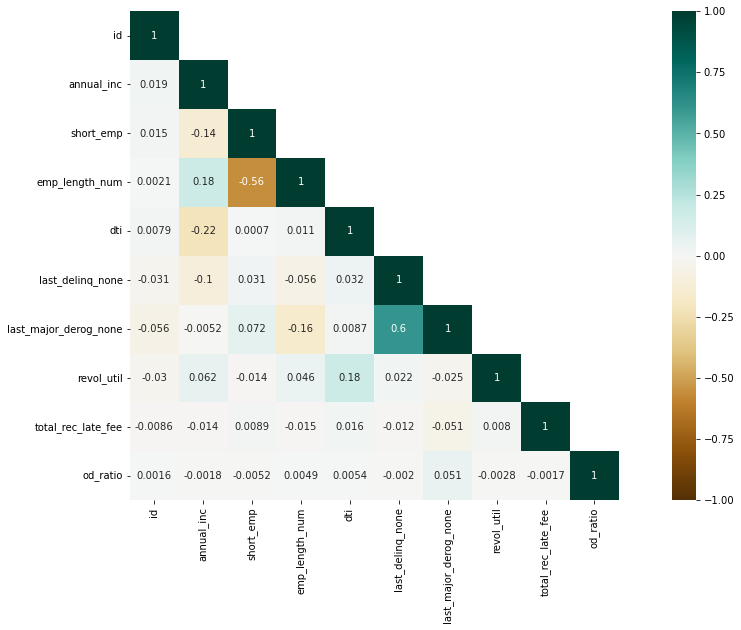%0A)

In \[23\]:

    ###Data Wrangling: Cleansing and Feature Selection
    ###OUTLIERS
    ###Let’s examine the data and check for any outliers.
    ###Starting by selecting and filtering numeric and categoric data.

    data_ca = data.select_dtypes(exclude=["int64","float64"]).copy()
    data_nu = data.select_dtypes(exclude=["object","category"]).copy()

In \[33\]:

    # Boxplot: Visualizing the numeric data dispersion

    fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(8, 16))
    index = 0
    axs = axs.flatten()
    for k,v in data_nu.items():
        sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
        index += 1
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
      warnings.warn(single_var_warning.format("Horizontal", "y"))

![](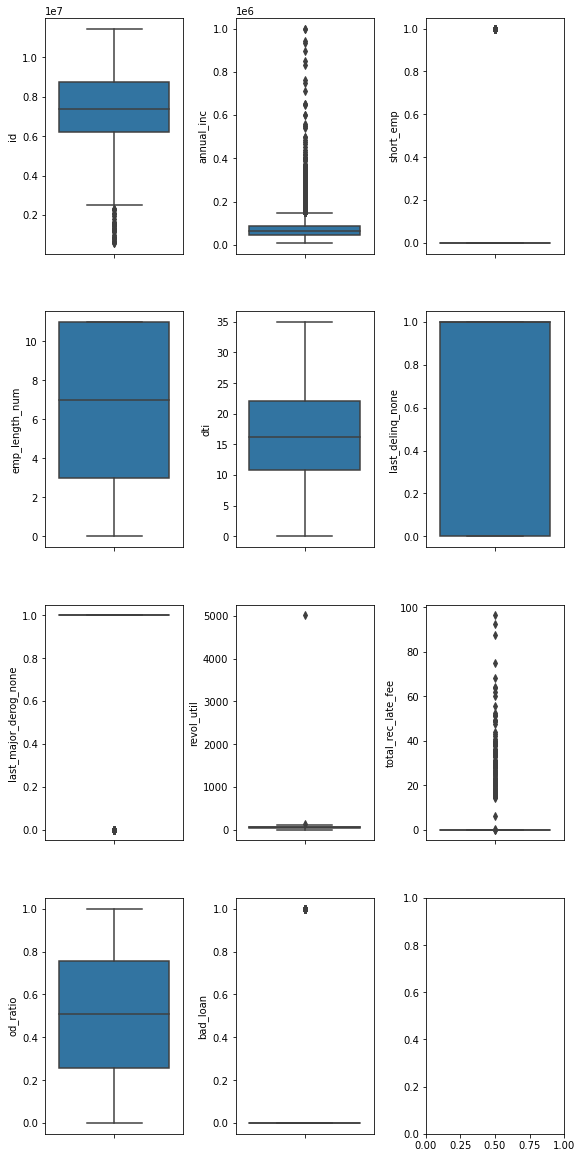%0A)

In \[ \]:

     

In \[34\]:

    display(data.describe().loc[["mean","50%","std"]].loc[:,["annual_inc","revol_util","total_rec_late_fee"]])

|      | annual_inc   | revol_util | total_rec_late_fee |
|------|--------------|------------|--------------------|
| mean | 73349.578350 | 55.958148  | 0.290622           |
| 50%  | 65000.000000 | 57.100000  | 0.000000           |
| std  | 45198.567255 | 42.117456  | 3.108654           |

In \[35\]:

    print(data.annual_inc.describe())
    boxhist("annual_inc")

    count      20000.000000
    mean       73349.578350
    std        45198.567255
    min         8412.000000
    25%        47000.000000
    50%        65000.000000
    75%        88000.000000
    max      1000000.000000
    Name: annual_inc, dtype: float64

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](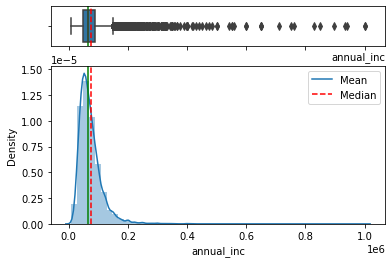%0A)

In \[36\]:

    # Dealing with the outliers through IQR score method
    Q1 = data['annual_inc'].quantile(0.25)
    Q3 = data['annual_inc'].quantile(0.75)
    IQR = Q3 - Q1
    data['annual_inc'] = data.annual_inc[~((data.annual_inc < (Q1 - 1.5 * IQR)) |(data.annual_inc > (Q3 + 1.5 * IQR)))]

    print(data.annual_inc.describe())

    count     19074.000000
    mean      66792.117857
    std       27241.646991
    min        8412.000000
    25%       46000.000000
    50%       62000.000000
    75%       84000.000000
    max      149000.000000
    Name: annual_inc, dtype: float64

In \[37\]:

    boxhist("annual_inc")

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](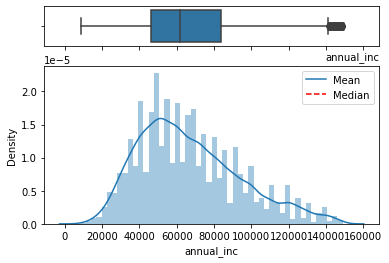%0A)

In \[38\]:

    print(int(data_nu.annual_inc.describe()[0]) - int(data.annual_inc.describe()[0]),"outliers were removed with this operation.")

    926 outliers were removed with this operation.

In \[39\]:

    print(data.revol_util.describe())
    boxhist("revol_util")

    count    20000.000000
    mean        55.958148
    std         42.117456
    min          0.000000
    25%         38.800000
    50%         57.100000
    75%         73.900000
    max       5010.000000
    Name: revol_util, dtype: float64

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](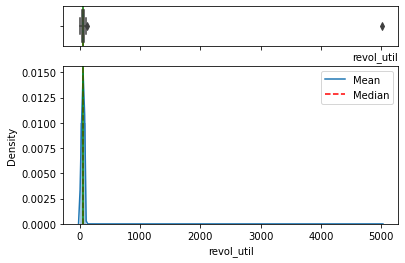%0A)

In \[40\]:

    # Dealing with the outlier of revol_util
    value = data.revol_util.quantile([.99999])
    p = value.iloc[0]
    data = data[data["revol_util"] < p]

    print(data['revol_util'].describe())

    boxhist("revol_util")

    count    19999.000000
    mean        55.710434
    std         23.380722
    min          0.000000
    25%         38.800000
    50%         57.100000
    75%         73.900000
    max        128.100000
    Name: revol_util, dtype: float64

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](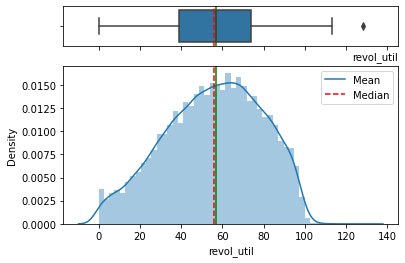%0A)

In \[41\]:

    print(int(data_nu.revol_util.describe()[0]) - int(data.revol_util.describe()[0]),"outlier was removed with this operation.")

    1 outlier was removed with this operation.

In \[42\]:

    sns.boxplot(x=data['total_rec_late_fee'],data=data)
    plt.xlabel('total_rec_late_fee', fontsize=10)
    plt.show()

![](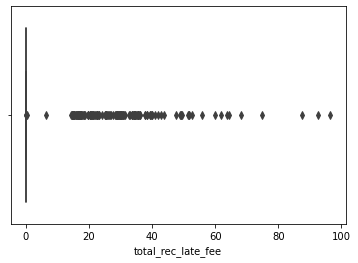%0A)

In \[43\]:

    value = data.total_rec_late_fee.quantile([.989])
    p = value.iloc[0]
    data = data[data["total_rec_late_fee"] < p]

In \[44\]:

    sns.boxplot(x=data['total_rec_late_fee'],data=data)
    plt.xlabel('total_rec_late_fee', fontsize=10)
    plt.show()

![](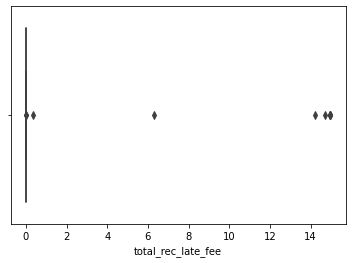%0A)

In \[45\]:

    for col in data[["annual_inc", "total_rec_late_fee", "revol_util"]].columns:
        sns.boxplot(data[col])
        plt.show()

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](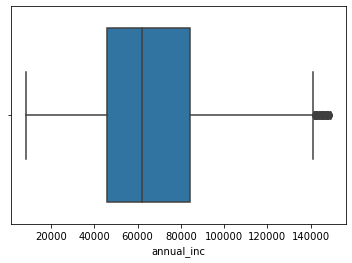%0A)

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](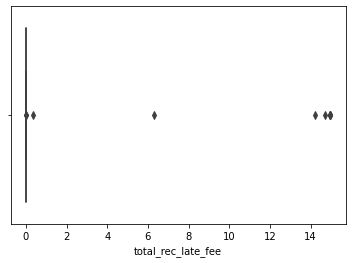%0A)

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(

![](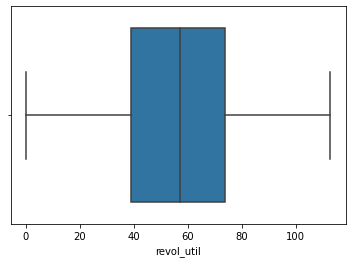%0A)

In \[46\]:

    for column in data.columns:
        if data[column].isna().sum() != 0:
            missing = data[column].isna().sum()
            portion = (missing / data.shape[0]) * 100
            print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

    'annual_inc': number of missing values '915' ---> '4.626%'
    'home_ownership': number of missing values '1476' ---> '7.462%'
    'dti': number of missing values '152' ---> '0.768%'
    'last_major_derog_none': number of missing values '19208' ---> '97.113%'

In \[47\]:

    data.annual_inc.value_counts(dropna=False)
    boxhist("annual_inc")

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](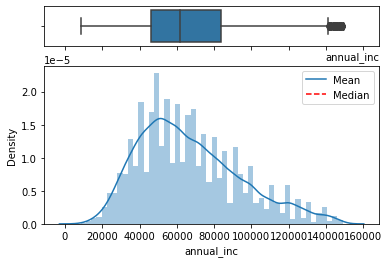%0A)

In \[48\]:

    data["annual_inc"] = data.annual_inc.fillna(data.annual_inc.mean())
    print(f"Fillna done. Anomalies detected: {data.annual_inc.isnull().values.any()}")

    Fillna done. Anomalies detected: False

In \[49\]:

    data.home_ownership.value_counts(dropna=False)

Out\[49\]:

    MORTGAGE    9744
    RENT        6959
    OWN         1600
    NaN         1476
    Name: home_ownership, dtype: int64

In \[50\]:

    barh("home_ownership")

![](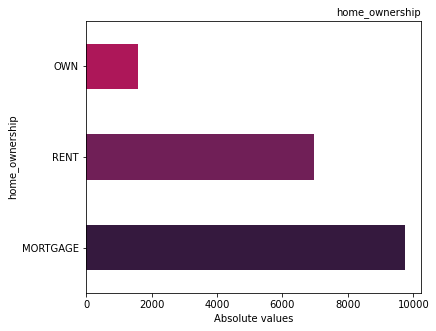%0A)

In \[51\]:

    data["home_ownership"] = data.home_ownership.fillna(data.home_ownership.value_counts().index[0])
    print(f"Imputation done. Missing values: {data.home_ownership.isnull().sum()}")

    Imputation done. Missing values: 0

In \[52\]:

    data.dti.value_counts(dropna=False)

Out\[52\]:

    NaN      152
    15.87     20
    19.64     20
    19.25     19
    11.45     19
            ... 
    34.32      1
    0.11       1
    1.61       1
    1.47       1
    32.53      1
    Name: dti, Length: 3286, dtype: int64

In \[53\]:

    boxhist("dti")

    C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
      warnings.warn(
    C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

![](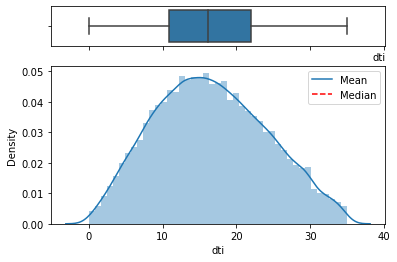%0A)

In \[54\]:

    data["dti"] = data.dti.fillna(data.dti.mean())
    print(f"Fillna done. Missing values: {data.dti.isnull().values.any()}")

    Fillna done. Missing values: False

In \[55\]:

    abs_mv = data.last_major_derog_none.value_counts(dropna=False)
    pc_mv = data.last_major_derog_none.value_counts(dropna=False, normalize=True) * 100
    pc_mv_df = pd.DataFrame(pc_mv)
    pc_mv_df.rename(columns={"last_major_derog_none":"Percent %"}, inplace=True)
    abs_pc = pd.concat([abs_mv,pc_mv_df], axis=1)
    abs_pc

Out\[55\]:

|     | last_major_derog_none | Percent % |
|-----|-----------------------|-----------|
| NaN | 19208                 | 97.113100 |
| 1.0 | 435                   | 2.199302  |
| 0.0 | 136                   | 0.687598  |

In \[56\]:

    data.drop("last_major_derog_none", axis=1, inplace=True)
    print(f"All missing values are solved in the entire dataset: {data.notnull().values.any()}")

    All missing values are solved in the entire dataset: True

In \[57\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 19779 entries, 0 to 19999
    Data columns (total 14 columns):
     #   Column              Non-Null Count  Dtype  
    ---  ------              --------------  -----  
     0   id                  19779 non-null  int64  
     1   grade               19779 non-null  object 
     2   annual_inc          19779 non-null  float64
     3   short_emp           19779 non-null  int64  
     4   emp_length_num      19779 non-null  int64  
     5   home_ownership      19779 non-null  object 
     6   dti                 19779 non-null  float64
     7   purpose             19779 non-null  object 
     8   term                19779 non-null  object 
     9   last_delinq_none    19779 non-null  int64  
     10  revol_util          19779 non-null  float64
     11  total_rec_late_fee  19779 non-null  float64
     12  od_ratio            19779 non-null  float64
     13  bad_loan            19779 non-null  int64  
    dtypes: float64(5), int64(5), object(4)
    memory usage: 2.3+ MB

In \[58\]:

    data.drop("id", axis=1, inplace=True)

    data.shape

Out\[58\]:

    (19779, 13)

In \[59\]:

    data_nu = data.select_dtypes(exclude=["object","category"]).copy()

In \[60\]:

    Xnum = data_nu.drop(["bad_loan"], axis= "columns")
    ynum = data_nu.bad_loan

In \[61\]:

    pd.DataFrame(
        [scipy.stats.pearsonr(Xnum[col], 
        ynum) for col in Xnum.columns], 
        columns=["Pearson Corr.", "p-value"], 
        index=Xnum.columns,
    ).round(4)

Out\[61\]:

|                    | Pearson Corr. | p-value |
|--------------------|---------------|---------|
| annual_inc         | -0.1227       | 0.0000  |
| short_emp          | 0.0368        | 0.0000  |
| emp_length_num     | -0.0406       | 0.0000  |
| dti                | 0.1394        | 0.0000  |
| last_delinq_none   | 0.0216        | 0.0024  |
| revol_util         | 0.1013        | 0.0000  |
| total_rec_late_fee | 0.0240        | 0.0007  |
| od_ratio           | 0.0007        | 0.9214  |

In \[62\]:

    Xcat = data.select_dtypes(exclude=['int64','float64']).copy()

In \[63\]:

    Xcat['target'] = data.bad_loan
    Xcat.dropna(how="any", inplace=True)
    ycat = Xcat.target
    Xcat.drop("target", axis=1, inplace=True)

In \[64\]:

    for col in Xcat.columns:
        table = pd.crosstab(Xcat[col], ycat)
        print()
        display(table)
        _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
        print(f"p-value: {pval:.25f}")

| target | 0    | 1    |
|--------|------|------|
| grade  |      |      |
| A      | 2030 | 120  |
| B      | 5257 | 736  |
| C      | 4375 | 1127 |
| D      | 2566 | 947  |
| E      | 1099 | 516  |
| F      | 509  | 333  |
| G      | 102  | 62   |

    p-value: 0.0000000000000000000000000

| target         | 0    | 1    |
|----------------|------|------|
| home_ownership |      |      |
| MORTGAGE       | 9298 | 1922 |
| OWN            | 1293 | 307  |
| RENT           | 5347 | 1612 |

    p-value: 0.0000000000000000000001931

| target             | 0    | 1    |
|--------------------|------|------|
| purpose            |      |      |
| car                | 138  | 30   |
| credit_card        | 3424 | 679  |
| debt_consolidation | 9824 | 2386 |
| home_improvement   | 881  | 199  |
| house              | 85   | 12   |
| major_purchase     | 289  | 83   |
| medical            | 135  | 37   |
| moving             | 92   | 28   |
| other              | 745  | 261  |
| small_business     | 173  | 84   |
| vacation           | 86   | 23   |
| wedding            | 66   | 19   |

    p-value: 0.0000000000000872350281927

| target    | 0     | 1    |
|-----------|-------|------|
| term      |       |      |
| 36 months | 12416 | 2437 |
| 60 months | 3522  | 1404 |

    p-value: 0.0000000000000000000000000

In \[65\]:

    data["grade"] = data.grade.map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

In \[66\]:

    df_term = data.term
    df_home = data.home_ownership
    df_purp = data.purpose
    #term
    t_ohe = pd.get_dummies(df_term)
    bin_enc_term = BinaryEncoder()
    t_bin = bin_enc_term.fit_transform(df_term)
    #home_ownsership
    h_ohe = pd.get_dummies(df_home)
    bin_enc_home = BinaryEncoder()
    h_bin = bin_enc_home.fit_transform(df_home)
    #purpose
    p_ohe = pd.get_dummies(df_purp)
    bin_enc_purp = BinaryEncoder()
    p_bin = bin_enc_purp.fit_transform(df_purp)

In \[67\]:

    data = pd.get_dummies(data, columns=["term","home_ownership"])

In \[68\]:

    bin_enc_purp = BinaryEncoder()
    data_bin = bin_enc_purp.fit_transform(data.purpose)

In \[69\]:

    # Concatenating both datasets
    df = pd.concat([data,data_bin],axis=1)
    # Dropping 'purpose'
    df.drop(["purpose"], axis=1, inplace=True)
    # Lowering upper characters
    df.columns = [x.lower() for x in df.columns]
    # printing 5 first rows
    df.head()

Out\[69\]:

|     | grade | annual_inc | short_emp | emp_length_num | dti   | last_delinq_none | revol_util | total_rec_late_fee | od_ratio | bad_loan | term\_ 36 months | term\_ 60 months | home_ownership_mortgage | home_ownership_own | home_ownership_rent | purpose_0 | purpose_1 | purpose_2 | purpose_3 |
|-----|-------|------------|-----------|----------------|-------|------------------|------------|--------------------|----------|----------|------------------|------------------|-------------------------|--------------------|---------------------|-----------|-----------|-----------|-----------|
| 0   | 7     | 100000.0   | 1         | 1              | 26.27 | 1                | 43.2       | 0.0                | 0.160624 | 0        | 1                | 0                | 0                       | 0                  | 1                   | 0         | 0         | 0         | 1         |
| 1   | 7     | 83000.0    | 0         | 4              | 5.39  | 0                | 21.5       | 0.0                | 0.810777 | 0        | 1                | 0                | 0                       | 1                  | 0                   | 0         | 0         | 0         | 1         |
| 2   | 4     | 78000.0    | 0         | 11             | 18.45 | 1                | 46.3       | 0.0                | 0.035147 | 1        | 0                | 1                | 1                       | 0                  | 0                   | 0         | 0         | 1         | 0         |
| 3   | 4     | 37536.0    | 0         | 6              | 12.28 | 0                | 10.7       | 0.0                | 0.534887 | 1        | 0                | 1                | 1                       | 0                  | 0                   | 0         | 0         | 1         | 1         |
| 4   | 4     | 65000.0    | 0         | 11             | 11.26 | 0                | 15.2       | 0.0                | 0.166500 | 0        | 1                | 0                | 1                       | 0                  | 0                   | 0         | 0         | 1         | 0         |

In \[97\]:

    # ROC Curve: Area Under the Curve
    def auc_roc_plot(y_test, y_preds):
        fpr, tpr, thresholds = roc_curve(y_test,y_preds)
        roc_auc = auc(fpr, tpr)
        print(roc_auc)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In \[98\]:

    # Making a copy of the dataset
    df_lr = df.copy()

    # Dividing the dataset in train (80%) and test (20%)
    train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.2, random_state = seed)
    X_train_lr = train_set_lr.drop(['bad_loan'], axis = 1)
    y_train_lr = train_set_lr['bad_loan']
    X_test_lr = test_set_lr.drop(['bad_loan'], axis = 1)
    y_test_lr = test_set_lr['bad_loan']

    # Normalizing the train and test data
    scaler_lr = MinMaxScaler()
    features_names = X_train_lr.columns
    X_train_lr = scaler_lr.fit_transform(X_train_lr)
    X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
    X_test_lr = scaler_lr.transform(X_test_lr)
    X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)


    lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )
    parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
    clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_lr, y_train_lr)

    clf_lr

    clf_lr.best_estimator_

Out\[98\]:

    LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                       random_state=42)

In \[99\]:

    y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]

In \[100\]:

    aucroclr=auc_roc_plot(y_test_lr, y_preds_lr)
    print(aucroclr)

    0.7066791432730296

![](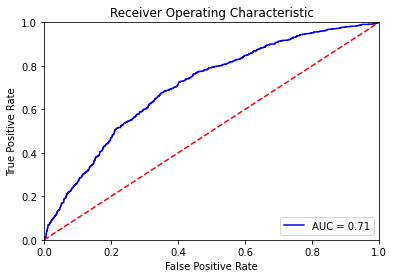%0A)

    None

In \[107\]:

    from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
    aucroclr=roc_auc_score(y_test_lr, y_preds_lr)
    print(aucroclr)

    0.7066791432730296

In \[108\]:

    # Confusion Matrix display
    plot_confusion_matrix(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

    tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()
    tn_lr = tn
    fp_lr = fp
    fn_lr = fn
    tp_lr = tp

![](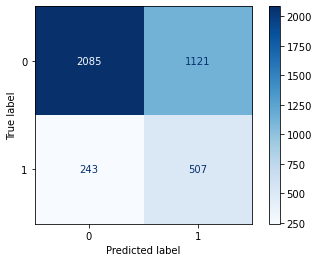%0A)

In \[109\]:

    # Making a copy of the dataset
    df_knn = df.copy()

    # Dividing the dataset in train (80%) and test (20%)
    train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)
    X_train_knn = train_set_knn.drop(['bad_loan'], axis = 1)
    y_train_knn = train_set_knn['bad_loan']
    X_test_knn = test_set_knn.drop(['bad_loan'], axis = 1)
    y_test_knn = test_set_knn['bad_loan']

    # Normalizing train and test data
    scaler_knn = MinMaxScaler()
    features_names = X_train_knn.columns
    X_train_knn = scaler_knn.fit_transform(X_train_knn)
    X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)
    X_test_knn = scaler_knn.transform(X_test_knn)
    X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In \[125\]:

In \[110\]:

    for k in range(1, 200, 5):
        k = k + 1
        knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
        acc = knn.score(X_test_knn, y_test_knn)
        print('Accuracy for k =', k, ' is:', acc)

    Accuracy for k = 2  is: 0.7904448938321537
    Accuracy for k = 7  is: 0.7939838220424671
    Accuracy for k = 12  is: 0.8066228513650152
    Accuracy for k = 17  is: 0.8063700707785642
    Accuracy for k = 22  is: 0.8086450960566228
    Accuracy for k = 27  is: 0.8081395348837209
    Accuracy for k = 32  is: 0.8099089989888777
    Accuracy for k = 37  is: 0.8109201213346815
    Accuracy for k = 42  is: 0.8111729019211324
    Accuracy for k = 47  is: 0.8109201213346815
    Accuracy for k = 52  is: 0.8094034378159757
    Accuracy for k = 57  is: 0.8104145601617796
    Accuracy for k = 62  is: 0.8101617795753286
    Accuracy for k = 67  is: 0.8104145601617796
    Accuracy for k = 72  is: 0.8101617795753286
    Accuracy for k = 77  is: 0.8101617795753286
    Accuracy for k = 82  is: 0.8104145601617796
    Accuracy for k = 87  is: 0.8104145601617796
    Accuracy for k = 92  is: 0.8101617795753286
    Accuracy for k = 97  is: 0.8099089989888777
    Accuracy for k = 102  is: 0.8101617795753286
    Accuracy for k = 107  is: 0.8104145601617796
    Accuracy for k = 112  is: 0.8101617795753286
    Accuracy for k = 117  is: 0.8101617795753286
    Accuracy for k = 122  is: 0.8104145601617796
    Accuracy for k = 127  is: 0.8104145601617796
    Accuracy for k = 132  is: 0.8101617795753286
    Accuracy for k = 137  is: 0.8101617795753286
    Accuracy for k = 142  is: 0.8101617795753286
    Accuracy for k = 147  is: 0.8101617795753286
    Accuracy for k = 152  is: 0.8104145601617796
    Accuracy for k = 157  is: 0.8104145601617796
    Accuracy for k = 162  is: 0.8104145601617796
    Accuracy for k = 167  is: 0.8104145601617796
    Accuracy for k = 172  is: 0.8104145601617796
    Accuracy for k = 177  is: 0.8104145601617796
    Accuracy for k = 182  is: 0.8104145601617796
    Accuracy for k = 187  is: 0.8104145601617796
    Accuracy for k = 192  is: 0.8104145601617796
    Accuracy for k = 197  is: 0.8104145601617796

In \[111\]:

    knn = KNeighborsClassifier(n_neighbors = 42, weights='uniform').fit(X_train_knn, y_train_knn)
    y_preds_knn = knn.predict(X_test_knn)

In \[112\]:

    aucrocknn=auc_roc_plot(y_test_knn, y_preds_knn)
    aucrocknn

    0.5065963817841547

![](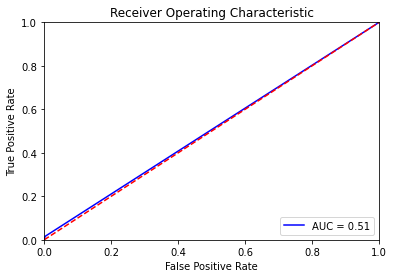%0A)

In \[113\]:

    aucrocknn=roc_auc_score(y_test_knn, y_preds_knn)
    print(aucrocknn)

    0.5065963817841547

In \[114\]:

    # Confusion Matrix display
    plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

    # Creating assignments for Final Results
    tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()
    tn_knn = tn
    fp_knn = fp
    fn_knn = fn
    tp_knn = tp

![](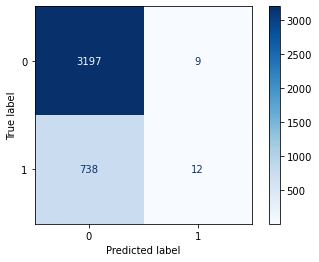%0A)

In \[115\]:

    # Making a copy of the dataset
    df_rf = df.copy()

    # Dividing the dataset in train (80%) and test (20%)
    train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)
    X_train_rf = train_set_rf.drop(['bad_loan'], axis = 1)
    y_train_rf = train_set_rf['bad_loan']
    X_test_rf = test_set_rf.drop(['bad_loan'], axis = 1)
    y_test_rf = test_set_rf['bad_loan']

In \[116\]:

    rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)
    parameters = {'n_estimators':[10, 100, 300, 1000]}
    clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

In \[117\]:

    y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]

In \[118\]:

    aucrocrf=auc_roc_plot(y_test_rf, y_preds_rf)
    aucrocrf

    0.6831790393013101

![](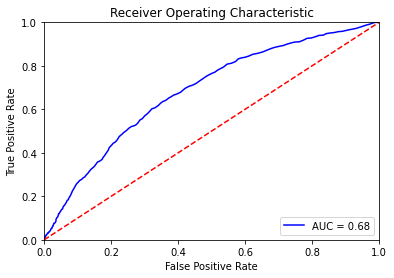%0A)

In \[119\]:

    aucrocrf=roc_auc_score(y_test_rf, y_preds_rf)
    print(aucrocrf)

    0.6831790393013101

In \[84\]:

    # Confusion Matrxi display
    plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues");

    # Creating assignments for Final Results
    tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()
    tn_rf = tn
    fp_rf = fp
    fn_rf = fn
    tp_rf = tp

![](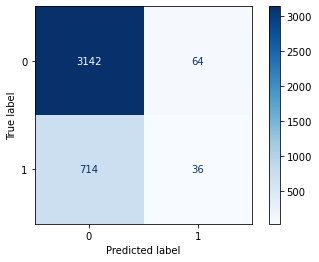%0A)

In \[85\]:

In \[86\]:

In \[ \]:

     

In \[ \]:

     

In \[122\]:

    aucrocsvc=auc_roc_plot(y_test_svc, y_preds_svc)
    aucrocsvc

    0.6762416302765648

![](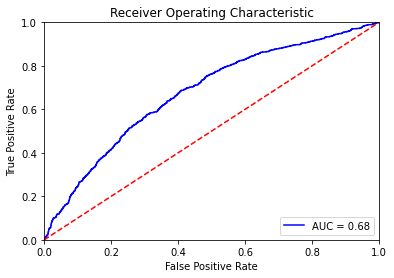%0A)

In \[114\]:

    # Confusion Matrix display
    plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");

    # Creating assignments for Final Results
    tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()
    tn_svc = tn
    fp_svc = fp
    fn_svc = fn
    tp_svc = tp

![](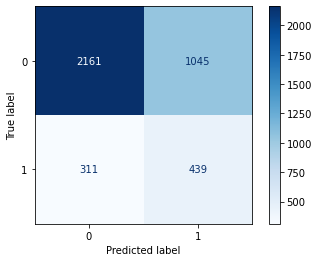%0A)

In \[120\]:

    results_1 = {'Classifier': ['AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
                 'Logistic Regression (LR)': [aucroclr, (tn_lr/3956*100).round(2), (fp_lr/3956*100).round(2), (fn_lr/3956*100).round(2), (tp_lr/3956*100).round(2)],
                 'K Nearest Neighbour (KNN)': [aucrocknn, (tn_knn/3956*100).round(2),(fp_knn/3956*100).round(2), (fn_knn/3956*100).round(2),(tp_knn/3956*100).round(2)],
                 'Random Forest (RF)': [aucrocrf, (tn_rf/3956*100).round(2), (fp_rf/3956*100).round(2), (fn_rf/3956*100).round(2),(tp_rf/3956*100).round(2)],}

    df1 = pd.DataFrame(results_1, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)',  'Random Forest (RF)'])

In \[121\]:

    df1.set_index("Classifier", inplace=True)
    results = df1.T
    results

Out\[121\]:

| Classifier                | AUC ROC (%) | TN (%) | FP (%) | FN (%) | TP (%) |
|---------------------------|-------------|--------|--------|--------|--------|
| Logistic Regression (LR)  | 0.706679    | 52.70  | 28.34  | 6.14   | 12.82  |
| K Nearest Neighbour (KNN) | 0.506596    | 80.81  | 0.23   | 18.66  | 0.30   |
| Random Forest (RF)        | 0.683179    | 79.42  | 1.62   | 18.05  | 0.91   |

In \[122\]:

    # Creating table for graphic visualization
    results_2 = {'Classifier': ['ROC AUC'], 'Logistic Regression (LR)': [aucroclr], 'K Nearest Neighbour (KNN)': [aucrocknn], 'Random Forest (RF)': [aucrocrf]}
    df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)', 'Random Forest (RF)'])
    df2.set_index("Classifier", inplace=True)
    results_2 = df2

    # Display tHe graph
    ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), figsize=(12,8) ,fontsize=10, grid=True)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.legend(fontsize=8.5, loc="upper right")
    plt.xlabel('')
    plt.xticks(rotation='horizontal')
    plt.ylabel('Relative frequency (%)')
    plt.show()

![](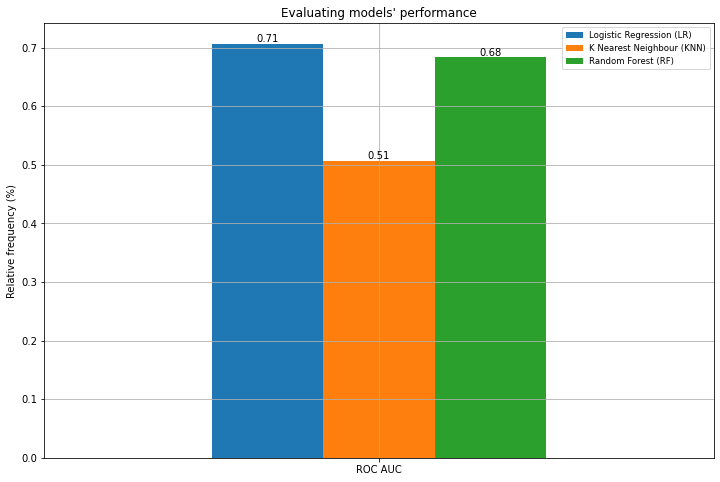%0A)